In [1]:
%load_ext autoreload
%autoreload 2 

## Modules & Libraries

In [2]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as T

## Dataset Instance & Specifications

In [3]:
from data import *

In [4]:
transform = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

In [5]:
mode = 'train'
path = os.path.join(os.getcwd(), os.path.join('dataset', mode))

In [6]:
data = DigitMnistDataset(mode=mode, path=path, transform=transform)

## Labels Histogram

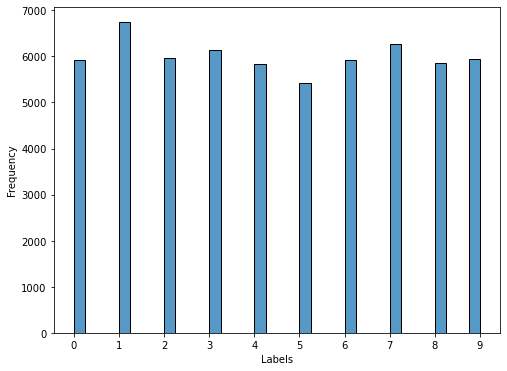

In [7]:
data.plot_label_distribution()

## Plot of Sample Images

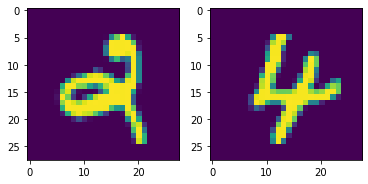

In [8]:
data.display_sample_images()

## Test Dataset Instance & Specifications


In [9]:
mode = 'test'
path = os.path.join(os.getcwd(), os.path.join('dataset', mode))

In [10]:
test_data = DigitMnistDataset(mode=mode, path=path, transform=transform)

## Plot of Sample Images from the Test Dataset

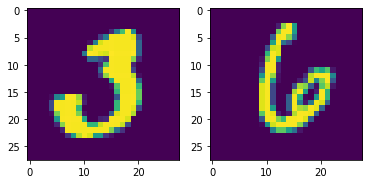

In [11]:
test_data.display_sample_images()

## Split into Training & Validation Data

In [12]:
from torch.utils.data import random_split

In [13]:
num_samples = len(data)
split_ratio = 0.8
num_train = int(num_samples * split_ratio)
num_val = num_samples - num_train

In [14]:
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_val}")

Number of training samples: 48000
Number of validation samples: 12000


In [15]:
train_data, val_data = random_split(data, [num_train, num_val])

## Data Loaders

In [16]:
from torch.utils.data import DataLoader

In [17]:
train_loader = DataLoader(train_data, batch_size = 1024, shuffle=True, num_workers=0, collate_fn=None,pin_memory=True)

In [18]:
validation_loader = DataLoader(val_data, batch_size = 8192, shuffle=True, num_workers=0, collate_fn=None,pin_memory=True)

In [19]:
test_loader = DataLoader(test_data, batch_size = 8192, shuffle=True, num_workers=0, collate_fn=None,pin_memory=True)

## Model instance & Specifications

In [20]:
from model import DigitRecognizer

In [21]:
in_channels = 1
num_classes = 10
bias =True
out_channels=2
dropout=0.1

In [22]:
model = DigitRecognizer(in_channels=in_channels, out_channels=out_channels, num_classes=num_classes, dropout=dropout, bias=bias)

False 0.1
True 0.1
False 0.1
True 0.1
False 0.1


In [23]:
model

DigitRecognizer(
  (model_list): ModuleList(
    (0): ModelLayer(
      (conv): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (mp): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
      (dropoutLayer): Dropout2d(p=0.1, inplace=False)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (2): ModelLayer(
      (conv): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (mp): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
      (drop

In [24]:
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

Number of trainable parameters: 11170


## Training Specifications

In [25]:
learning_rate = 2e-2
weight_decay = 0.01
momentum = 0.9
epochs=30

## Optimizer

In [26]:
from torch.optim import AdamW, SGD

In [27]:
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, amsgrad=True)

## Learning Rate Scheduler

In [28]:
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

In [29]:
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

## Loss Function

In [30]:
from torch.nn import CrossEntropyLoss

In [31]:
criterion = CrossEntropyLoss(weight=None)


In [32]:
torch.backends.cudnn.benchmark = True

## Cuda Device

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
print(device)

cuda


## Training Loop

In [35]:
from train import *

In [36]:
total_loss, val_losses, accuracies_train, accuracies_validation = train(model, optimizer, train_loader, validation_loader, criterion, epochs,scheduler=scheduler, device=device)

Current device: cuda


100%|██████████| 47/47 [00:56<00:00,  1.21s/it]

Evaluating epoch...


Epoch: 0 | Loss: 36.71 | Train acc: 75.99 | Val acc: 92.50 | Val_loss: 0.718953400850296 | lr: 0.02 | Runtime: 71.71 seconds


100%|██████████| 47/47 [00:56<00:00,  1.19s/it]

Evaluating epoch...


Epoch: 1 | Loss: 7.28 | Train acc: 95.32 | Val acc: 97.28 | Val_loss: 0.16668657213449478 | lr: 0.02 | Runtime: 68.71 seconds


100%|██████████| 47/47 [00:54<00:00,  1.16s/it]

Evaluating epoch...


Epoch: 2 | Loss: 3.60 | Train acc: 97.68 | Val acc: 97.86 | Val_loss: 0.13613753020763397 | lr: 0.02 | Runtime: 67.08 seconds


100%|██████████| 47/47 [00:55<00:00,  1.19s/it]

Evaluating epoch...


Epoch: 3 | Loss: 2.91 | Train acc: 98.09 | Val acc: 98.07 | Val_loss: 0.12735546380281448 | lr: 0.02 | Runtime: 65.42 seconds


100%|██████████| 47/47 [00:54<00:00,  1.16s/it]

Evaluating epoch...


Epoch: 4 | Loss: 2.51 | Train acc: 98.36 | Val acc: 98.15 | Val_loss: 0.11930680647492409 | lr: 0.02 | Runtime: 66.40 seconds


100%|██████████| 47/47 [00:55<00:00,  1.17s/it]

Evaluating epoch...


Epoch: 5 | Loss: 2.21 | Train acc: 98.51 | Val acc: 98.38 | Val_loss: 0.10968656465411186 | lr: 0.02 | Runtime: 64.41 seconds


100%|██████████| 47/47 [00:47<00:00,  1.01s/it]

Evaluating epoch...


Epoch: 6 | Loss: 2.09 | Train acc: 98.60 | Val acc: 98.28 | Val_loss: 0.10537449270486832 | lr: 0.02 | Runtime: 56.87 seconds


100%|██████████| 47/47 [00:55<00:00,  1.18s/it]

Evaluating epoch...


Epoch: 7 | Loss: 1.98 | Train acc: 98.61 | Val acc: 98.34 | Val_loss: 0.1109713762998581 | lr: 0.02 | Runtime: 67.58 seconds


100%|██████████| 47/47 [00:55<00:00,  1.17s/it]

Evaluating epoch...


Epoch: 8 | Loss: 1.75 | Train acc: 98.84 | Val acc: 98.53 | Val_loss: 0.10478005185723305 | lr: 0.02 | Runtime: 67.57 seconds


100%|██████████| 47/47 [00:55<00:00,  1.18s/it]

Evaluating epoch...


Epoch: 9 | Loss: 1.60 | Train acc: 98.85 | Val acc: 98.57 | Val_loss: 0.09992244094610214 | lr: 0.02 | Runtime: 68.07 seconds


100%|██████████| 47/47 [00:52<00:00,  1.11s/it]

Evaluating epoch...


Epoch: 10 | Loss: 1.55 | Train acc: 98.94 | Val acc: 98.79 | Val_loss: 0.07834484428167343 | lr: 0.02 | Runtime: 61.72 seconds


100%|██████████| 47/47 [00:54<00:00,  1.16s/it]

Evaluating epoch...


Epoch: 11 | Loss: 1.33 | Train acc: 99.13 | Val acc: 98.80 | Val_loss: 0.08558682352304459 | lr: 0.02 | Runtime: 66.77 seconds


100%|██████████| 47/47 [00:57<00:00,  1.22s/it]

Evaluating epoch...


Epoch: 12 | Loss: 1.36 | Train acc: 99.10 | Val acc: 98.61 | Val_loss: 0.10868775472044945 | lr: 0.02 | Runtime: 69.74 seconds


100%|██████████| 47/47 [00:54<00:00,  1.16s/it]

Evaluating epoch...


Epoch: 13 | Loss: 1.31 | Train acc: 99.16 | Val acc: 98.87 | Val_loss: 0.07360184751451015 | lr: 0.02 | Runtime: 64.56 seconds


100%|██████████| 47/47 [00:48<00:00,  1.03s/it]

Evaluating epoch...


Epoch: 14 | Loss: 1.30 | Train acc: 99.13 | Val acc: 98.70 | Val_loss: 0.0924539715051651 | lr: 0.02 | Runtime: 59.22 seconds


100%|██████████| 47/47 [00:48<00:00,  1.04s/it]

Evaluating epoch...


Epoch: 15 | Loss: 1.28 | Train acc: 99.12 | Val acc: 98.45 | Val_loss: 0.11113397404551506 | lr: 0.02 | Runtime: 58.90 seconds


100%|██████████| 47/47 [00:48<00:00,  1.03s/it]

Evaluating epoch...


Epoch: 16 | Loss: 1.20 | Train acc: 99.17 | Val acc: 98.73 | Val_loss: 0.08929867669939995 | lr: 0.02 | Runtime: 58.06 seconds


100%|██████████| 47/47 [00:49<00:00,  1.06s/it]

Evaluating epoch...


Epoch: 17 | Loss: 1.10 | Train acc: 99.21 | Val acc: 98.57 | Val_loss: 0.105791836977005 | lr: 0.02 | Runtime: 59.07 seconds


100%|██████████| 47/47 [00:47<00:00,  1.00s/it]

Evaluating epoch...


Epoch: 18 | Loss: 1.05 | Train acc: 99.27 | Val acc: 98.52 | Val_loss: 0.09396595507860184 | lr: 0.02 | Runtime: 56.71 seconds


100%|██████████| 47/47 [00:47<00:00,  1.02s/it]

Evaluating epoch...


Epoch: 19 | Loss: 0.98 | Train acc: 99.27 | Val acc: 98.65 | Val_loss: 0.09708395227789879 | lr: 0.002 | Runtime: 57.39 seconds


100%|██████████| 47/47 [00:47<00:00,  1.00s/it]

Evaluating epoch...


Epoch: 20 | Loss: 0.51 | Train acc: 99.67 | Val acc: 99.05 | Val_loss: 0.07065143063664436 | lr: 0.002 | Runtime: 57.72 seconds


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]

Evaluating epoch...


Epoch: 21 | Loss: 0.27 | Train acc: 99.84 | Val acc: 99.11 | Val_loss: 0.06917865946888924 | lr: 0.002 | Runtime: 62.40 seconds


100%|██████████| 47/47 [00:48<00:00,  1.04s/it]

Evaluating epoch...


Epoch: 22 | Loss: 0.21 | Train acc: 99.90 | Val acc: 99.07 | Val_loss: 0.07538019120693207 | lr: 0.002 | Runtime: 58.38 seconds


100%|██████████| 47/47 [00:48<00:00,  1.04s/it]

Evaluating epoch...


Epoch: 23 | Loss: 0.17 | Train acc: 99.92 | Val acc: 99.06 | Val_loss: 0.07229309529066086 | lr: 0.002 | Runtime: 58.54 seconds


100%|██████████| 47/47 [00:47<00:00,  1.02s/it]

Evaluating epoch...


Epoch: 24 | Loss: 0.15 | Train acc: 99.94 | Val acc: 99.13 | Val_loss: 0.07653453946113586 | lr: 0.002 | Runtime: 57.08 seconds


100%|██████████| 47/47 [00:48<00:00,  1.03s/it]

Evaluating epoch...


Epoch: 25 | Loss: 0.13 | Train acc: 99.95 | Val acc: 99.03 | Val_loss: 0.07902942597866058 | lr: 0.002 | Runtime: 58.07 seconds


100%|██████████| 47/47 [00:49<00:00,  1.06s/it]

Evaluating epoch...


Epoch: 26 | Loss: 0.12 | Train acc: 99.95 | Val acc: 99.11 | Val_loss: 0.07890182361006737 | lr: 0.002 | Runtime: 60.40 seconds


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]

Evaluating epoch...


Epoch: 27 | Loss: 0.10 | Train acc: 99.96 | Val acc: 99.09 | Val_loss: 0.08171406388282776 | lr: 0.0002 | Runtime: 62.07 seconds


100%|██████████| 47/47 [00:47<00:00,  1.01s/it]

Evaluating epoch...


Epoch: 28 | Loss: 0.09 | Train acc: 99.97 | Val acc: 99.08 | Val_loss: 0.07946766540408134 | lr: 0.0002 | Runtime: 55.55 seconds


100%|██████████| 47/47 [00:51<00:00,  1.09s/it]

Evaluating epoch...


Epoch: 29 | Loss: 0.09 | Train acc: 99.97 | Val acc: 99.11 | Val_loss: 0.08123232424259186 | lr: 0.0002 | Runtime: 60.72 seconds


## Loss Plot

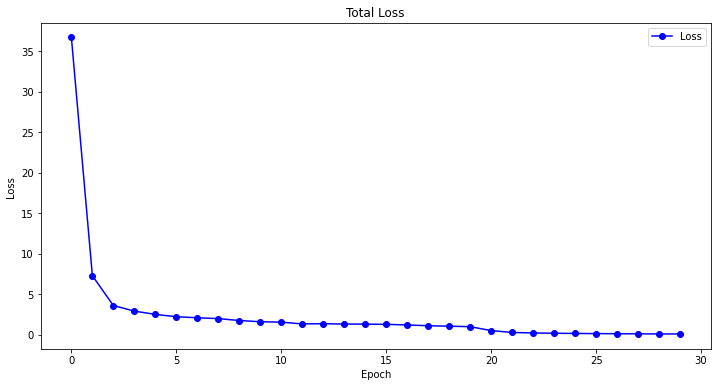

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), total_loss, 'bo-')
plt.legend(["Loss"], loc ="upper right")
plt.title('Total Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss ")
plt.show()

## Training Accracy VS Validation Accuracy Plot

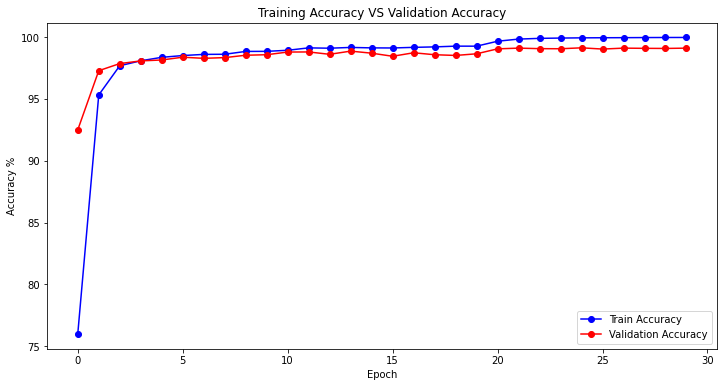

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), accuracies_train, 'bo-')
plt.plot(range(epochs), accuracies_validation, 'ro-')
plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.title('Training Accuracy VS Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.show()

## Predictions

In [50]:
from evaluate import *

In [55]:
test_acc, test_loss = evaluate(model, test_loader, criterion, device)

In [56]:
print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

99.04000091552734 0.06847186759114265


## Confusion Matrix

In [58]:
y_true, y_pred = predictions(model=model, data_loader=test_loader, device=device)

In [59]:
cf_matrix = calculate_confusion_matrix(y_true=y_true, y_pred=y_pred)

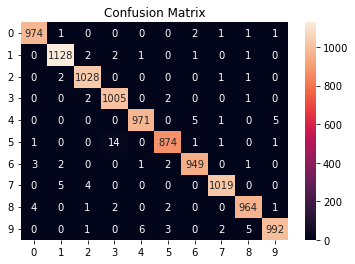

In [60]:
plot_cf_matrix(cf_matrix, range(10))

## Class Accuracy

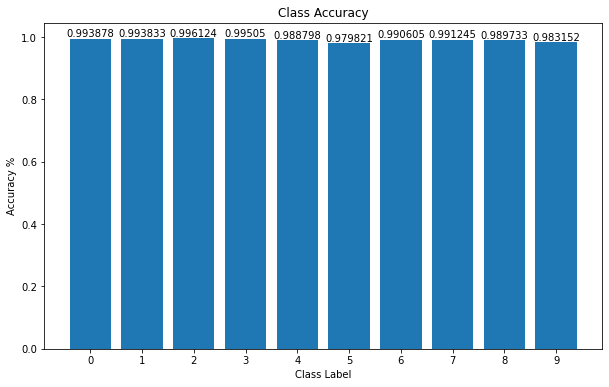

In [68]:
plot_per_class_accuracy(cf_matrix, range(10))


## Classification Report

In [65]:
classification_report = get_classification_report(y_true=y_true,
                                                  y_pred=y_pred,
                                                  )

In [66]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Save the Model

In [ ]:
param_name='model_acc_99'
path = ""

In [ ]:
path = os.path.join(path, param_name)
with open(path, 'wb') as file:
    torch.save({'model_state_dict': model.state_dict()}, file)
